# EDA (Exploratory Data Analysis)

### Importing the required libraries for this code

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
#importing the dataset
import kagglehub
# Downloading the latest version
path = kagglehub.dataset_download("govindaramsriram/energy-consumption-dataset-linear-regression")

print("Path to dataset is:", path)

Path to dataset is: C:\Users\JSK\.cache\kagglehub\datasets\govindaramsriram\energy-consumption-dataset-linear-regression\versions\1


In [7]:
# Path to the extracted dataset directory
data_dir = "C:\\Users\\JSK\\.cache\\kagglehub\\datasets\\govindaramsriram\\energy-consumption-dataset-linear-regression\\versions\\1"

# List all files in the directory to locate the CSV file
print("Files in directory:", os.listdir(data_dir))

Files in directory: ['test_energy_data.csv', 'train_energy_data.csv']


In [8]:
#Let's work on train_energy_data.csv first
#In order to change to see the results for test_energy_data.csv, just change the following variable
file_name = 'train_energy_data.csv'
file_path = os.path.join(data_dir, file_name)

In [12]:
#Loading the DF
df = pd.read_csv(file_path)

### Basic checks on data

In [14]:
df.sample()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
534,Residential,29552,42,38,25.04,Weekday,4082.39


In [15]:
#Describing the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [20]:
print(df.shape)

(1000, 7)


- As from info we infer that all columns have 1000 non-null values, this means there are no broken records

In [35]:
df.isna().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [36]:

df.duplicated().sum()

0

- No Duplicates
- No Null Values
- 2 categorical columns
- 5 numerical columns

### Countplots

In [26]:
#Let's make countplots from the object datatypes
obj_columns = df.select_dtypes(include=['object']).columns
print(list(obj_columns))

['Building Type', 'Day of Week']


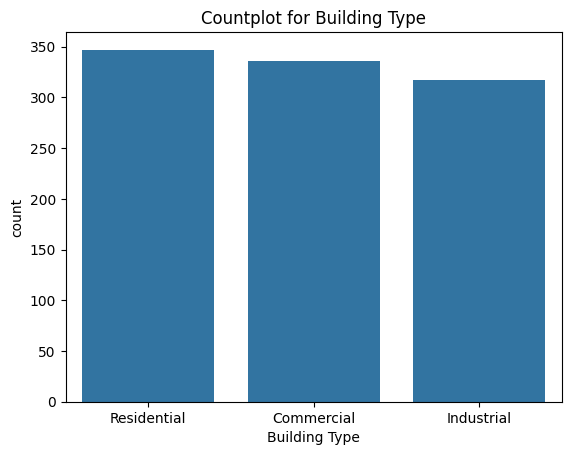

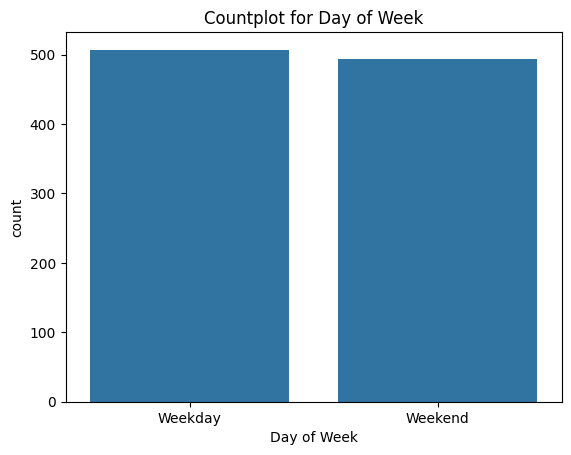

In [30]:
for i in obj_columns:
    plt.figure()  # Create a new figure
    sns.countplot(x=i, data=df)
    plt.title(f'Countplot for {i}')  # Optional: Add a title
    plt.show()

- Our data covers more info about residential buildings than of commercial and industrial, however they don't have huge gaps
- The data of weekday and weekends are almost in similar amounts with weekday having a slight edge over weekend

### Numerical Columns

In [38]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(list(numerical_cols))

['Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature', 'Energy Consumption']


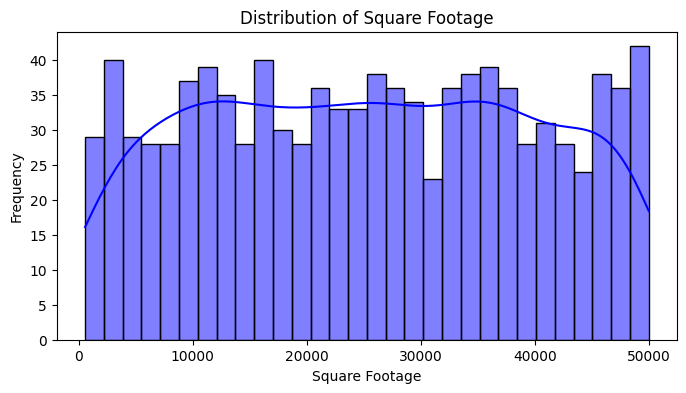

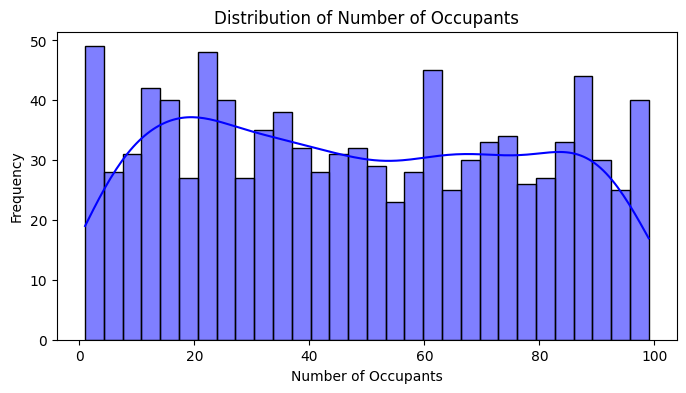

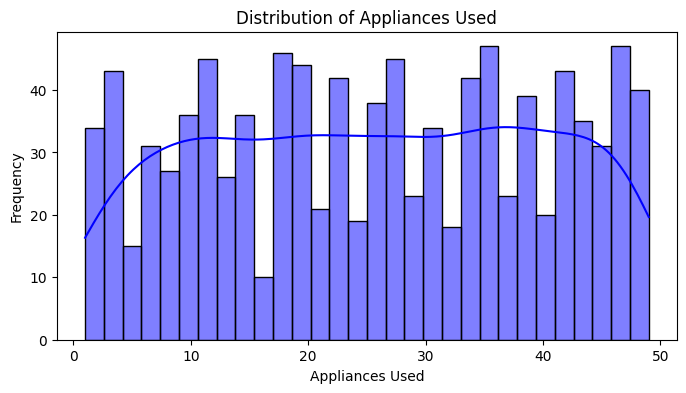

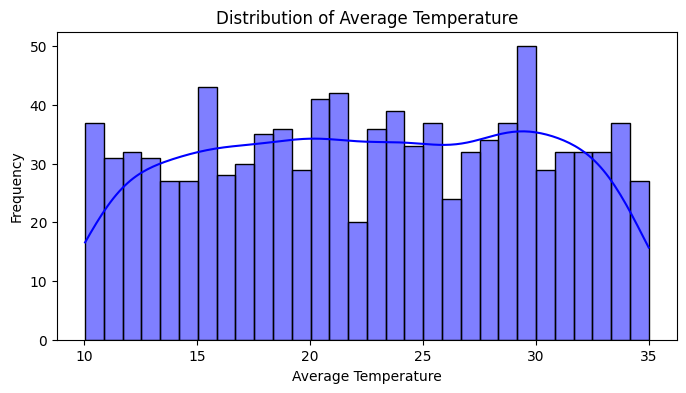

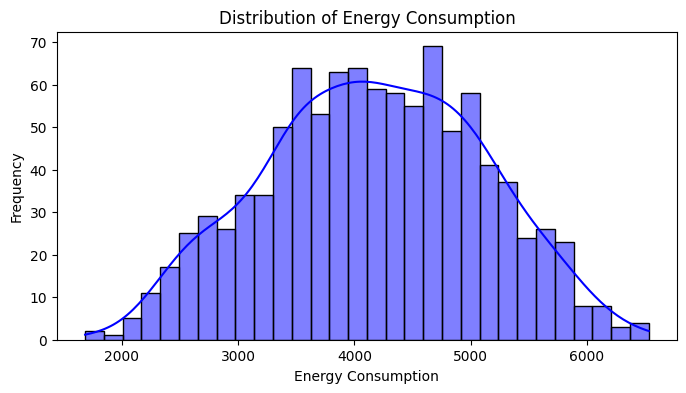

In [39]:
# Plotting histograms for each numerical column
for i in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[i], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()


- Histplots suggest that the distribution is more or less uniform

In [40]:
print(df[numerical_cols].describe())

       Square Footage  Number of Occupants  Appliances Used  \
count        1000.000          1000.000000      1000.000000   
mean        25462.388            48.372000        25.606000   
std         14294.554            29.061972        14.105166   
min           560.000             1.000000         1.000000   
25%         13169.750            22.000000        13.000000   
50%         25477.000            47.000000        26.000000   
75%         37446.250            73.250000        38.000000   
max         49997.000            99.000000        49.000000   

       Average Temperature  Energy Consumption  
count          1000.000000         1000.000000  
mean             22.611390         4166.252570  
std               7.139943          933.313064  
min              10.050000         1683.950000  
25%              16.475000         3509.482500  
50%              22.815000         4175.730000  
75%              28.850000         4863.850000  
max              34.990000         6530.

C:\Users\JSK\AppData\Local\Temp\ipykernel_28888\431448176.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='green')


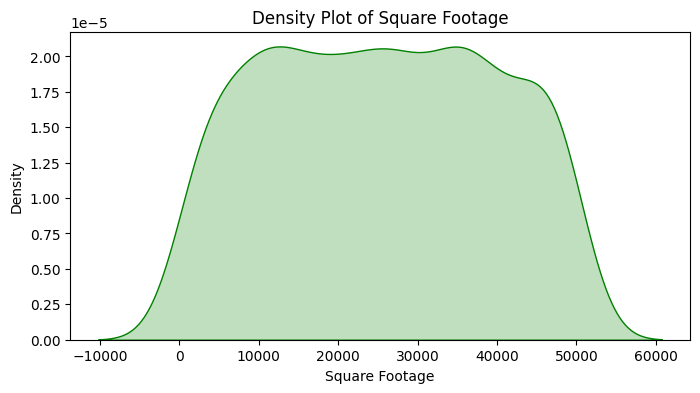

C:\Users\JSK\AppData\Local\Temp\ipykernel_28888\431448176.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='green')


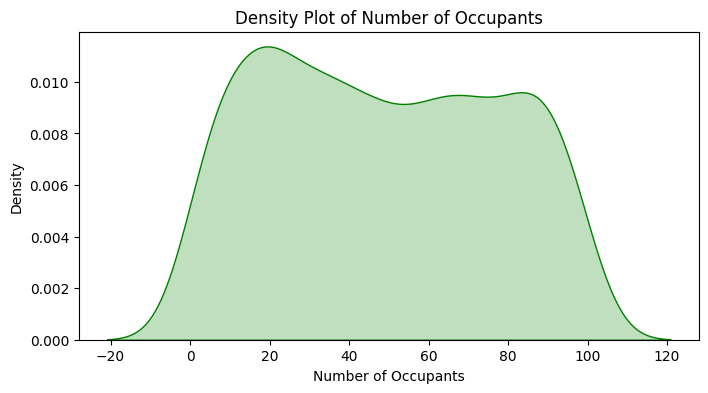

C:\Users\JSK\AppData\Local\Temp\ipykernel_28888\431448176.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='green')


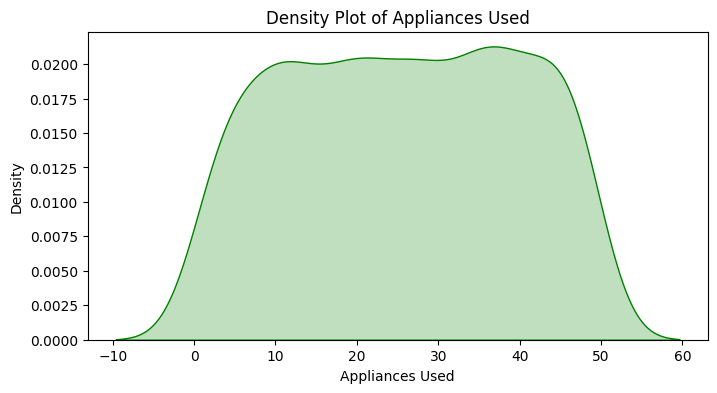

C:\Users\JSK\AppData\Local\Temp\ipykernel_28888\431448176.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='green')


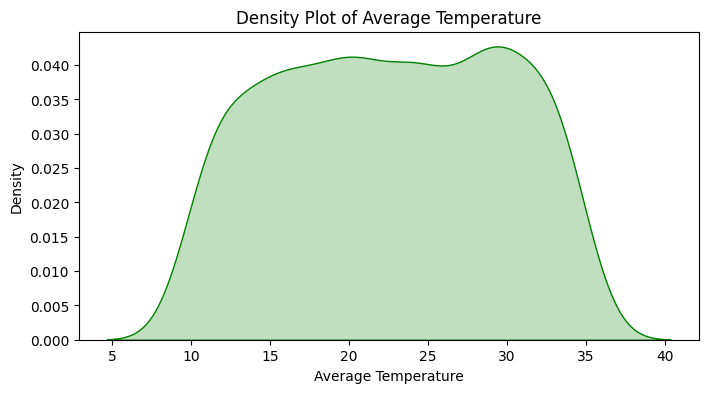

C:\Users\JSK\AppData\Local\Temp\ipykernel_28888\431448176.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='green')


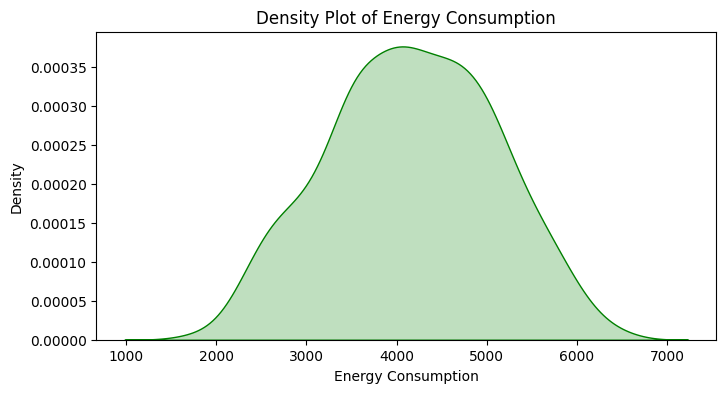

In [41]:
# Density plot for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[col], shade=True, color='green')
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()


### Scatterplots

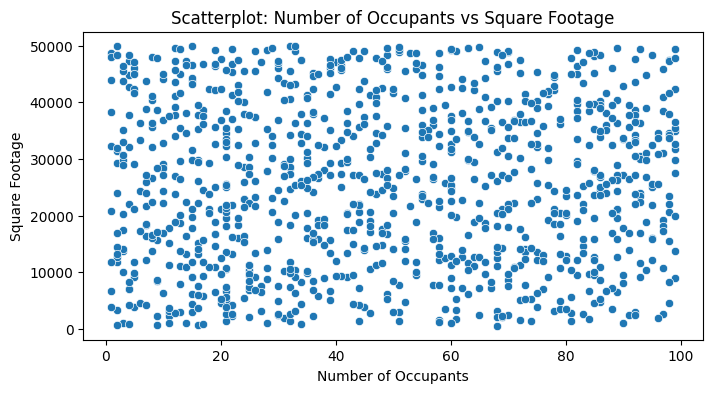

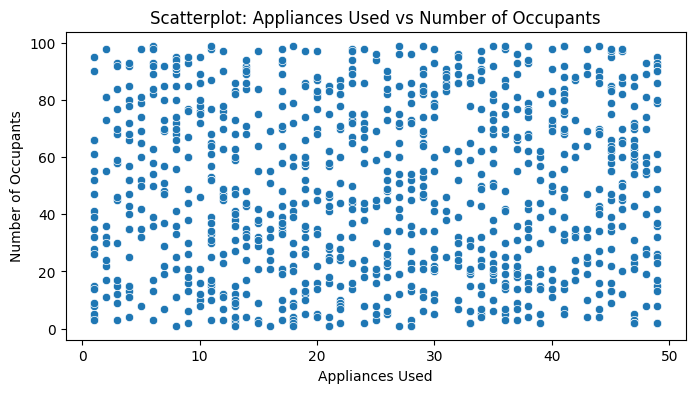

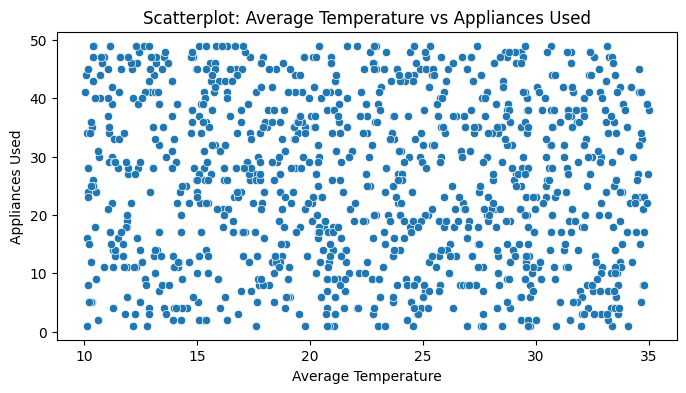

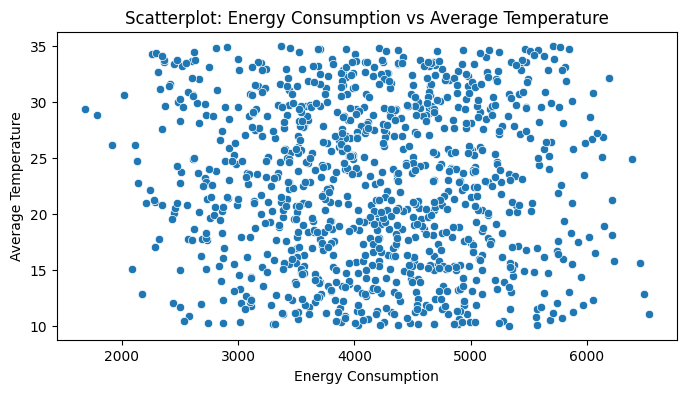

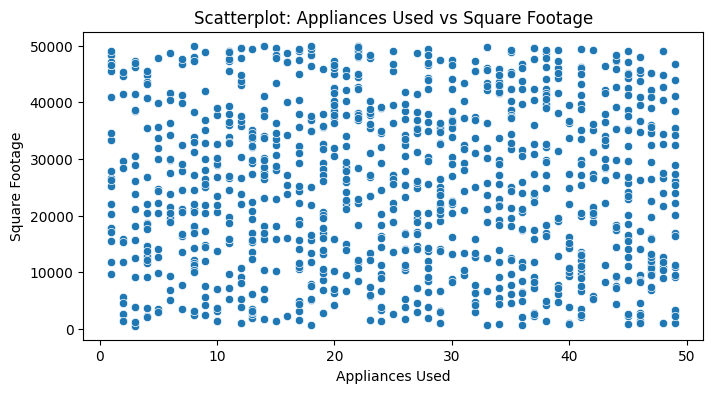

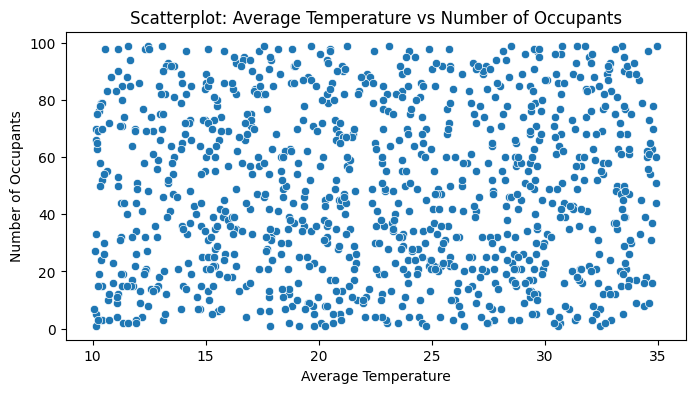

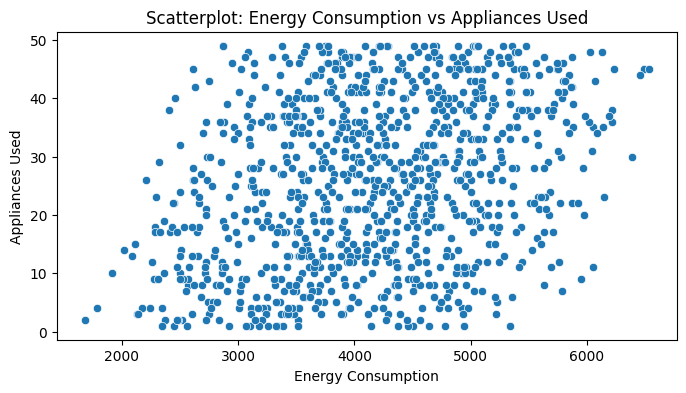

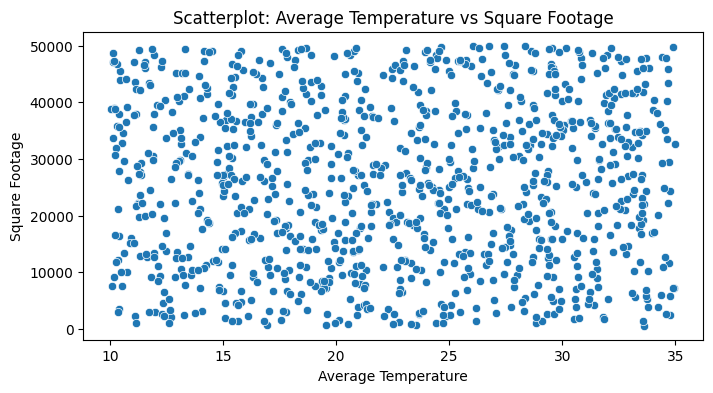

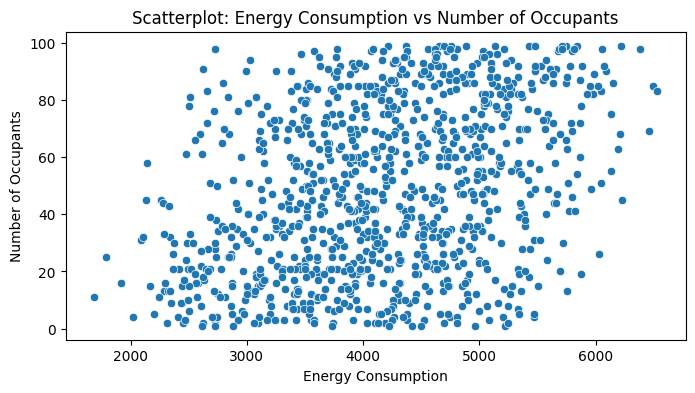

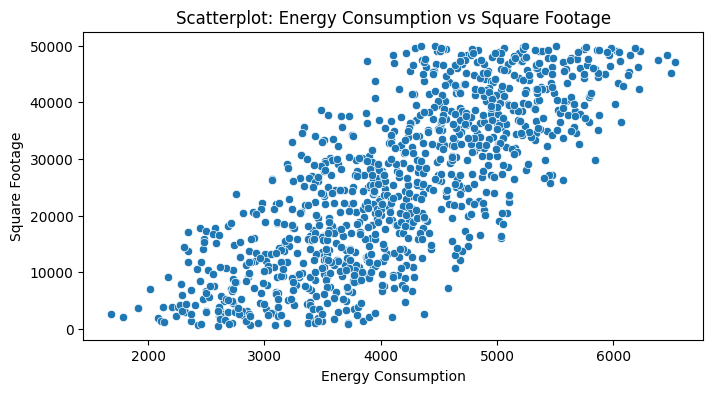

In [48]:
# Scatterplot for every pair of numerical columns
ctr = 0
for i in range(len(numerical_cols)):
    sumvar = i + ctr
    for col2 in numerical_cols:
        if sumvar >= len(numerical_cols): #Avoid duplicates
            break
        if numerical_cols[sumvar] != col2:  # Avoid self-plots
            plt.figure(figsize=(8, 4))
            sns.scatterplot(x=df[numerical_cols[sumvar]], y=df[col2])
            plt.title(f'Scatterplot: {numerical_cols[sumvar]} vs {col2}')
            plt.xlabel(numerical_cols[sumvar])
            plt.ylabel(col2)
            plt.show()
        sumvar += 1

- As we can see: most of the data is random but energy consumption vs square footage is linear
- using linear models like linear regression is suggested

### Correlation Matrix

In [50]:
# Compute the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Display the matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                     Square Footage  Number of Occupants  Appliances Used  \
Square Footage             1.000000             0.033379        -0.013478   
Number of Occupants        0.033379             1.000000         0.023646   
Appliances Used           -0.013478             0.023646         1.000000   
Average Temperature        0.027273             0.014122        -0.062870   
Energy Consumption         0.774873             0.354485         0.312792   

                     Average Temperature  Energy Consumption  
Square Footage                  0.027273            0.774873  
Number of Occupants             0.014122            0.354485  
Appliances Used                -0.062870            0.312792  
Average Temperature             1.000000           -0.034487  
Energy Consumption             -0.034487            1.000000  


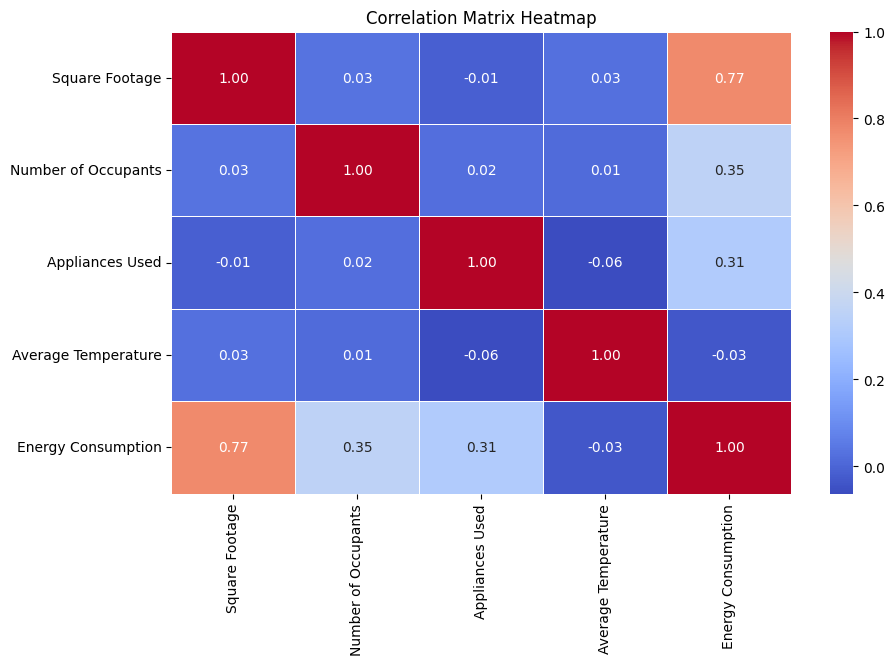

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


- Strong correlations: Energy consumption and square footage
- Weak or no correlation: 
  - Appliances used and square footage
  - average temperature and number of occupants

### Outlier Detection

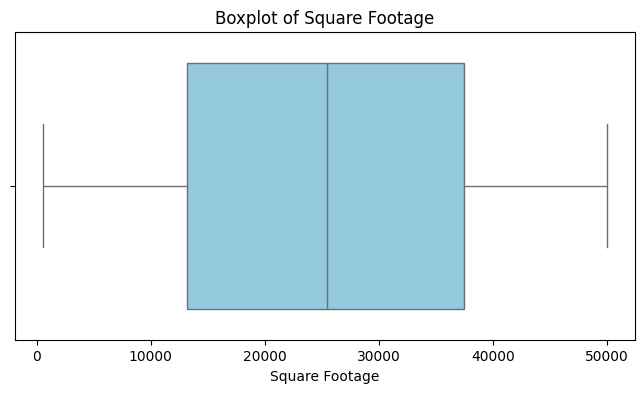

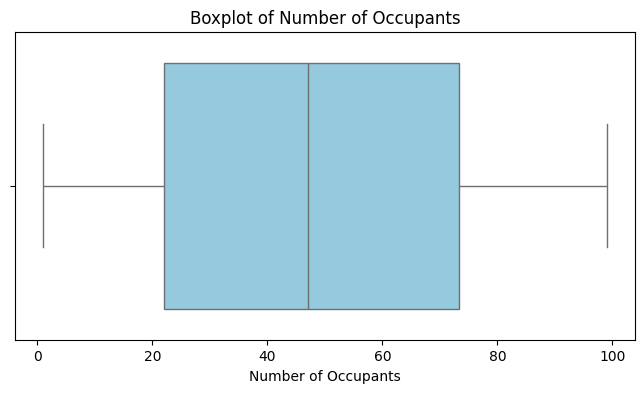

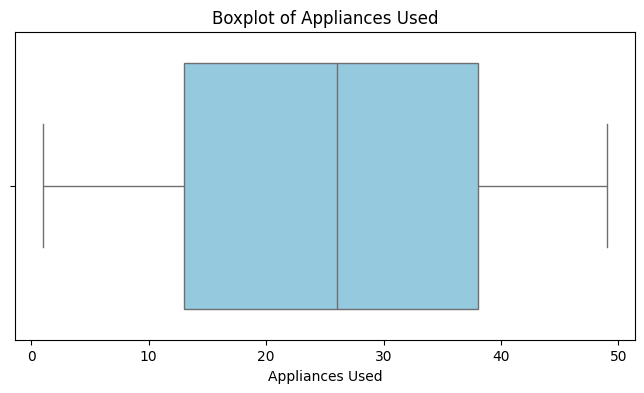

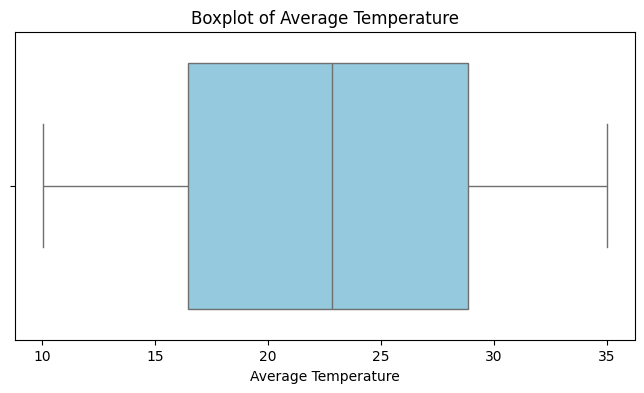

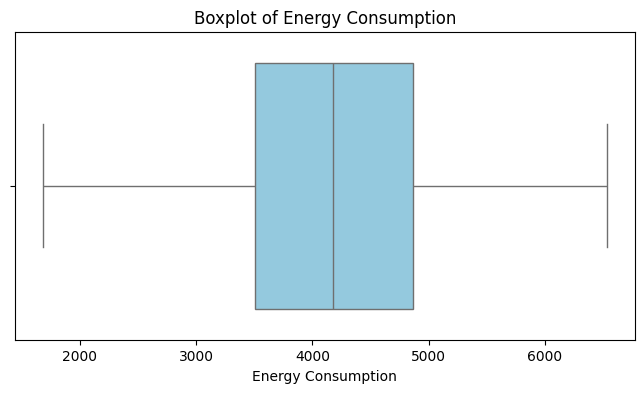

In [53]:
# Plot boxplots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


In [54]:
# Detect outliers using IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'{col}: {len(outliers)} outliers')


Square Footage: 0 outliers
Number of Occupants: 0 outliers
Appliances Used: 0 outliers
Average Temperature: 0 outliers
Energy Consumption: 0 outliers


C:\Users\JSK\AppData\Local\Temp\ipykernel_28888\992613442.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_col], y=df[num_col], palette='Set2')


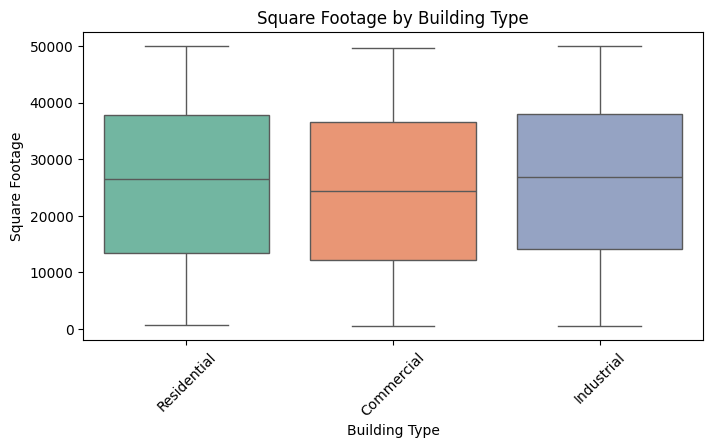

C:\Users\JSK\AppData\Local\Temp\ipykernel_28888\992613442.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_col], y=df[num_col], palette='Set2')


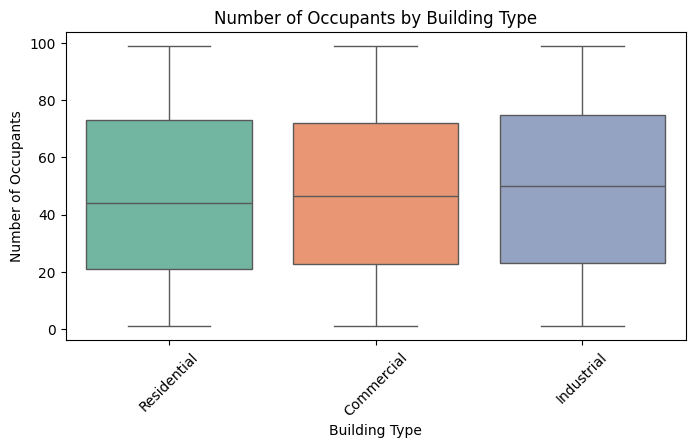

C:\Users\JSK\AppData\Local\Temp\ipykernel_28888\992613442.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_col], y=df[num_col], palette='Set2')


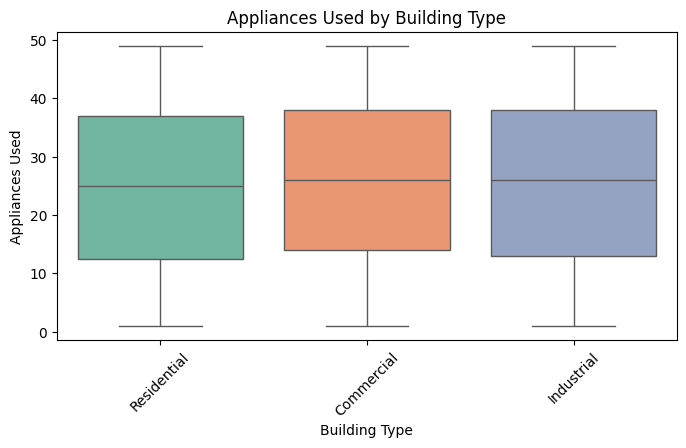

C:\Users\JSK\AppData\Local\Temp\ipykernel_28888\992613442.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_col], y=df[num_col], palette='Set2')


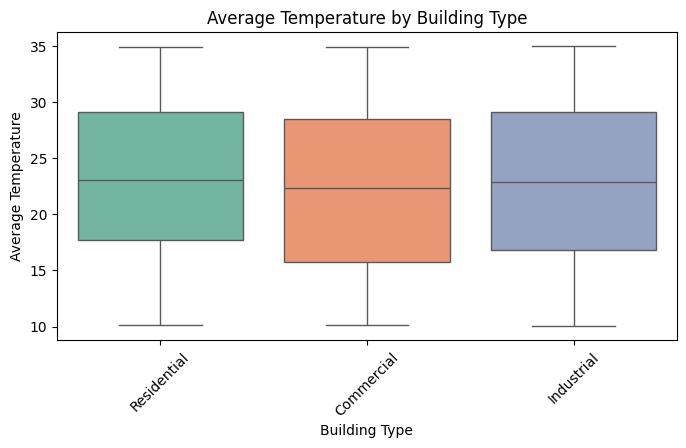

C:\Users\JSK\AppData\Local\Temp\ipykernel_28888\992613442.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_col], y=df[num_col], palette='Set2')


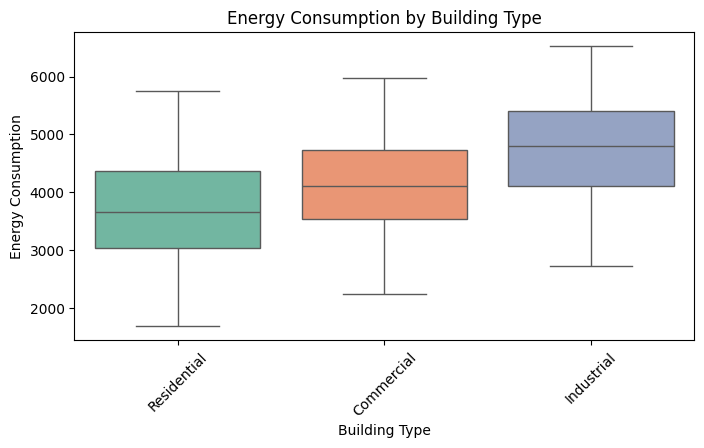

C:\Users\JSK\AppData\Local\Temp\ipykernel_28888\992613442.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_col], y=df[num_col], palette='Set2')


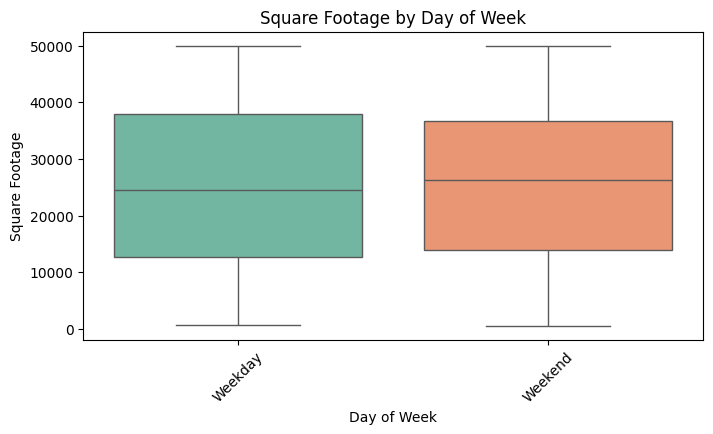

C:\Users\JSK\AppData\Local\Temp\ipykernel_28888\992613442.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_col], y=df[num_col], palette='Set2')


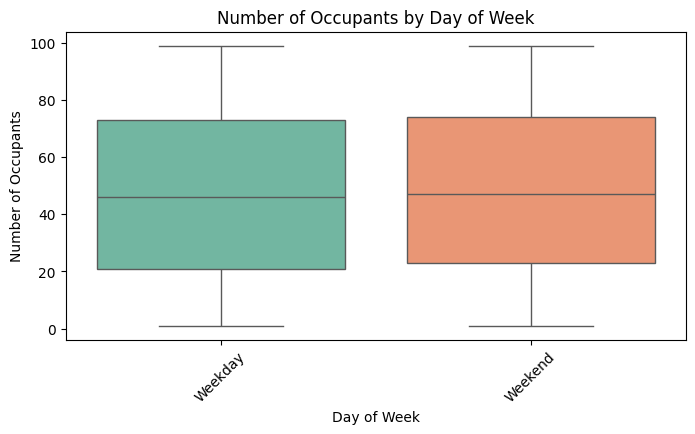

C:\Users\JSK\AppData\Local\Temp\ipykernel_28888\992613442.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_col], y=df[num_col], palette='Set2')


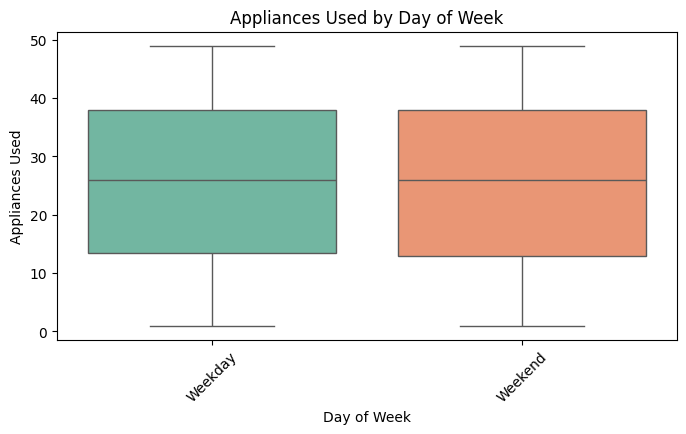

C:\Users\JSK\AppData\Local\Temp\ipykernel_28888\992613442.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_col], y=df[num_col], palette='Set2')


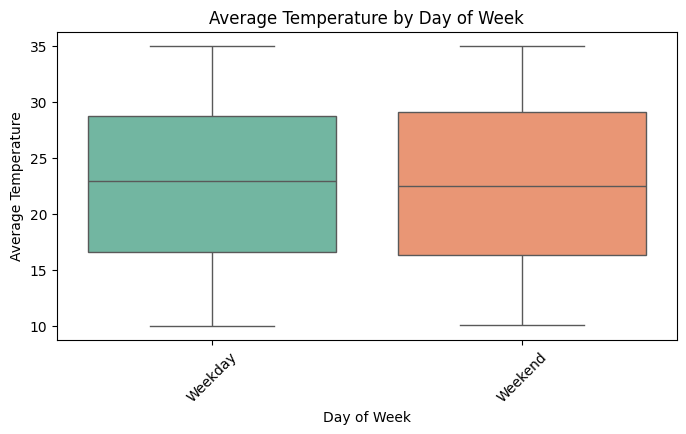

C:\Users\JSK\AppData\Local\Temp\ipykernel_28888\992613442.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[cat_col], y=df[num_col], palette='Set2')


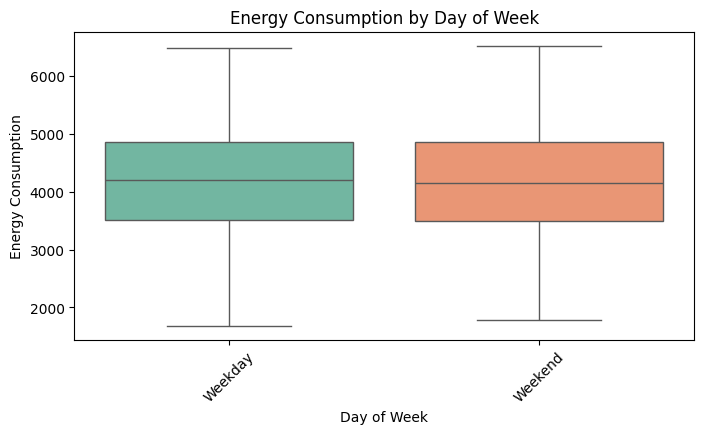

In [57]:
# Plot boxplots for numerical columns grouped by categorical columns
for cat_col in obj_columns:
    for num_col in numerical_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[cat_col], y=df[num_col], palette='Set2')
        plt.title(f'{num_col} by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45)
        plt.show()


C:\Users\JSK\AppData\Local\Temp\ipykernel_28888\2502376348.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[cat_col], y=df[num_col], palette='muted')


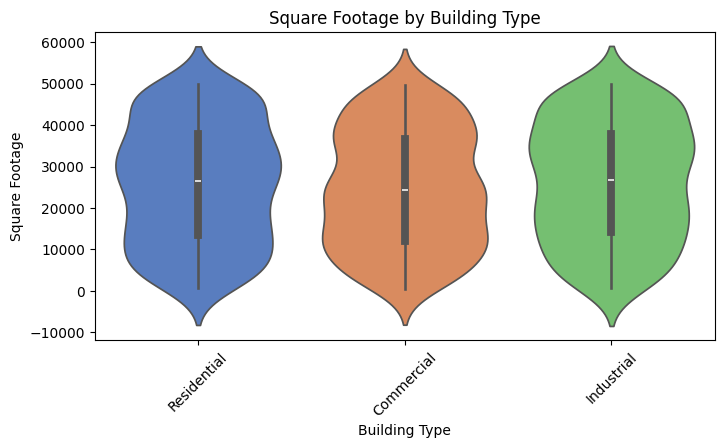

C:\Users\JSK\AppData\Local\Temp\ipykernel_28888\2502376348.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[cat_col], y=df[num_col], palette='muted')


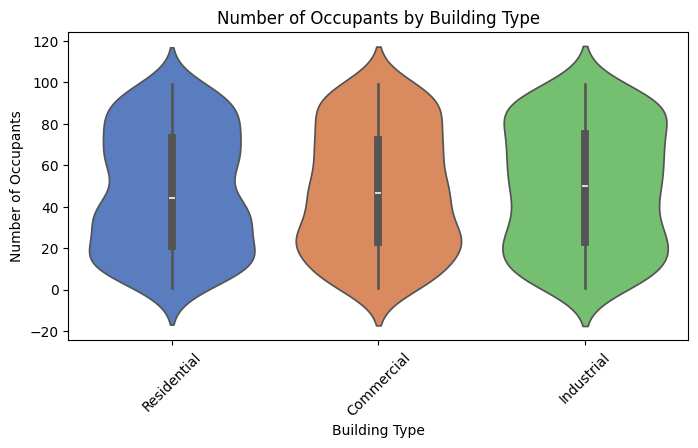

C:\Users\JSK\AppData\Local\Temp\ipykernel_28888\2502376348.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[cat_col], y=df[num_col], palette='muted')


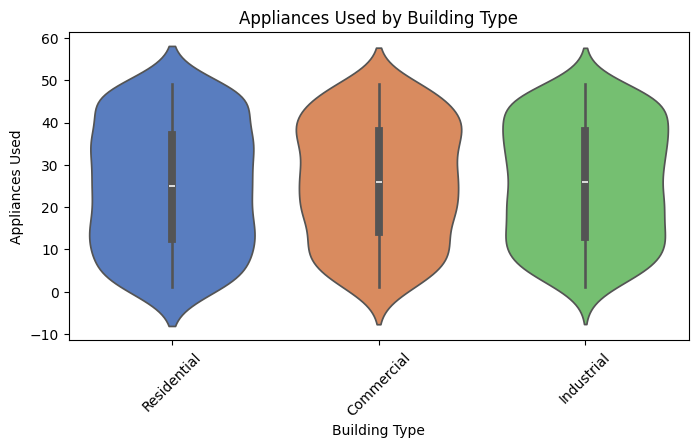

C:\Users\JSK\AppData\Local\Temp\ipykernel_28888\2502376348.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[cat_col], y=df[num_col], palette='muted')


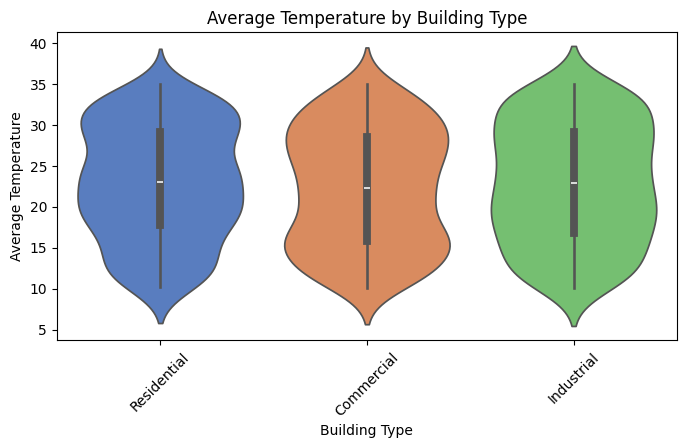

C:\Users\JSK\AppData\Local\Temp\ipykernel_28888\2502376348.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[cat_col], y=df[num_col], palette='muted')


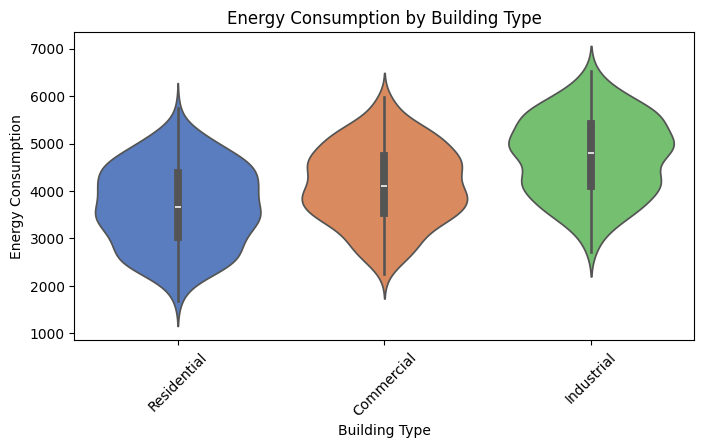

C:\Users\JSK\AppData\Local\Temp\ipykernel_28888\2502376348.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[cat_col], y=df[num_col], palette='muted')


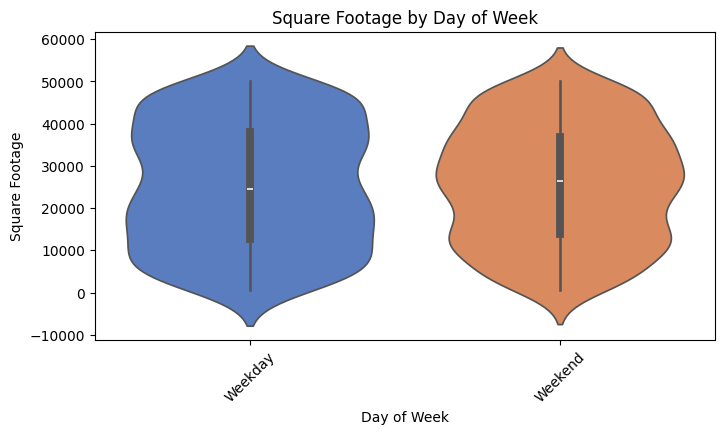

C:\Users\JSK\AppData\Local\Temp\ipykernel_28888\2502376348.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[cat_col], y=df[num_col], palette='muted')


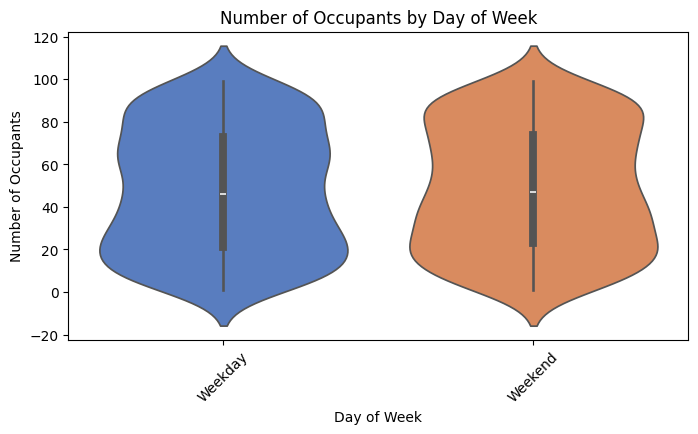

C:\Users\JSK\AppData\Local\Temp\ipykernel_28888\2502376348.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[cat_col], y=df[num_col], palette='muted')


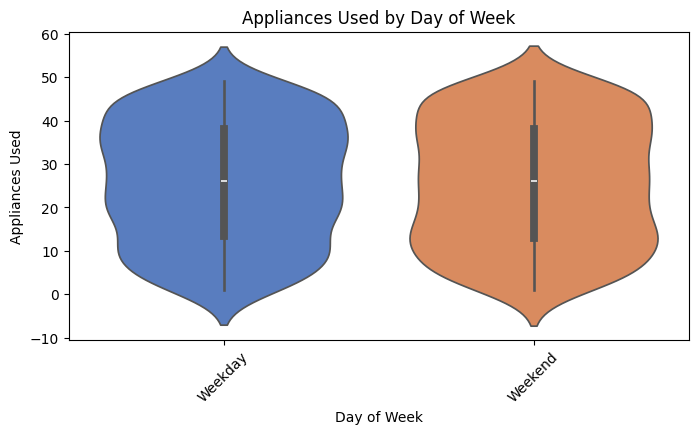

C:\Users\JSK\AppData\Local\Temp\ipykernel_28888\2502376348.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[cat_col], y=df[num_col], palette='muted')


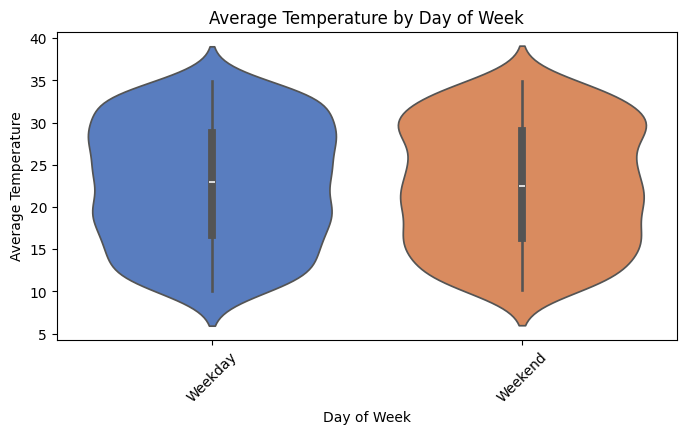

C:\Users\JSK\AppData\Local\Temp\ipykernel_28888\2502376348.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[cat_col], y=df[num_col], palette='muted')


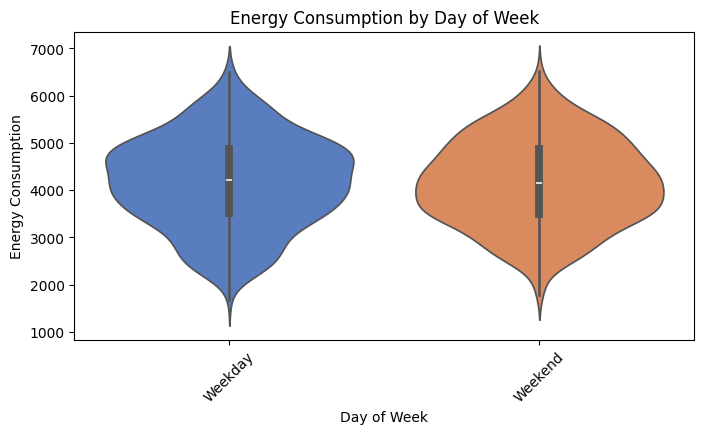

In [58]:
# Violin plots for numerical columns grouped by categorical columns
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(8, 4))
        sns.violinplot(x=df[cat_col], y=df[num_col], palette='muted')
        plt.title(f'{num_col} by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45)
        plt.show()


- One key point to note is how industrial energy consumption is way more than residential energy consumption
- Despite difference in energy consumption, max 'Average temperature ' almost same all 3 building types
- Day of Week has no impact on Energy Consumption of any of the Building Type
- Slight rise in Average Temp. in commercial on WeekDays than on Weekends